### Figure showing Table data on a map projection (bubble map)

_Author: Maria J. Molina (molina@ucar.edu)_

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import completions_module as cmodule

In [2]:
import cartopy.crs as crs
import cartopy.feature as cf
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [3]:
uni_loc = pd.read_csv('../data/hd2020_data_stata.csv', encoding='ISO-8859-1')  # uni locations

In [4]:
all_files = glob.glob("../data/completions_*.csv")
all_files = sorted(all_files)

In [5]:
df = cmodule.open_and_concat(all_files)
df = cmodule.bs_degrees(df)
df = cmodule.atmospheric_sciences(df)
top_30 = df.groupby('institution name').sum()['Hispanic or Latino total'].sort_values(ascending=False).head(30)  # TOTAL SUM (2009-2019)

In [6]:
top_30

institution name
Texas A & M University-College Station                 53
Florida State University                               35
University of the Incarnate Word                       23
University of California-Los Angeles                   21
University of Illinois at Urbana-Champaign             18
Pennsylvania State University-Main Campus              17
SUNY Maritime College                                  15
University of Oklahoma-Norman Campus                   15
Embry-Riddle Aeronautical University-Daytona Beach     14
Cornell University                                     14
University of Miami                                    12
San Jose State University                              12
Northern Illinois University                           12
University of Washington-Seattle Campus                12
Virginia Polytechnic Institute and State University    10
Valparaiso University                                   9
Rutgers University-New Brunswick                       

In [7]:
for num, i in enumerate(top_30.index):
    if uni_loc[uni_loc['INSTNM']==i][['INSTNM','LONGITUD','LATITUDE']].empty:
        print(i)

University of Illinois at Urbana-Champaign


In [8]:
uni = []
lat = []
lon = []
frq = []

for num, i in enumerate(top_30.index):
    
    if not uni_loc[uni_loc['INSTNM']==i][['INSTNM','LONGITUD','LATITUDE']].empty:
        
        uni.append(uni_loc[uni_loc['INSTNM']==i]['INSTNM'].to_numpy()[0])
        lon.append(uni_loc[uni_loc['INSTNM']==i]['LONGITUD'].to_numpy()[0])
        lat.append(uni_loc[uni_loc['INSTNM']==i]['LATITUDE'].to_numpy()[0])
        frq.append(top_30.iloc[num])
        
    if uni_loc[uni_loc['INSTNM']==i][['INSTNM','LONGITUD','LATITUDE']].empty:
        
        uni.append(uni_loc[uni_loc['INSTNM'].str.contains('University of Illinois Urbana-Champaign')]['INSTNM'].to_numpy()[0])
        lon.append(uni_loc[uni_loc['INSTNM'].str.contains('University of Illinois Urbana-Champaign')]['LONGITUD'].to_numpy()[0])
        lat.append(uni_loc[uni_loc['INSTNM'].str.contains('University of Illinois Urbana-Champaign')]['LATITUDE'].to_numpy()[0])
        frq.append(top_30.iloc[num])

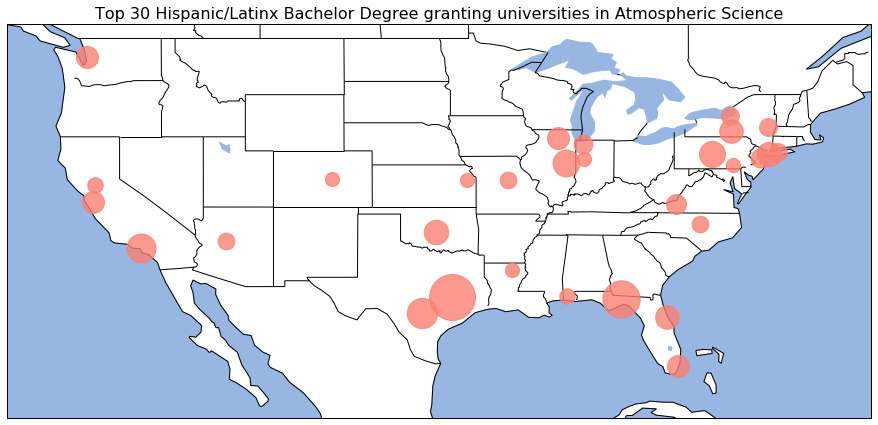

In [21]:
reader = shpreader.Reader(f'/glade/work/molina/DATA/cartopy_usstates/ne_50m_admin_1_states_provinces_lines.shp')
states = list(reader.geometries())
STATES = cfeature.ShapelyFeature(states, crs.PlateCarree())

fig = plt.figure(figsize=(12,10))

ax = fig.add_axes([0, 0, 1, 1], projection=crs.PlateCarree())

#ax.stock_img()
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAKES)
ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=90)

ax.set_extent([-128, -66.5, 22, 50], crs=crs.PlateCarree()) ## Important

for un, la, lo, fr in zip(uni, lat, lon, frq):

    plt.scatter(x=lo, y=la,
                color="salmon",
                s=fr * 40,
                alpha=0.8,
                transform=crs.PlateCarree(), zorder=100) ## Important
    
    #ax.annotate(un, xy=(lo, la), 
    #            xycoords=crs.PlateCarree()._as_mpl_transform(ax),
    #            ha='right', va='top')

ax.set_title('Top 30 Hispanic/Latinx Bachelor Degree granting universities in Atmospheric Science', fontsize=16)

plt.show()
plt.close('all')

### (Work in Progress) Adding annotations to map using uni abbreviations

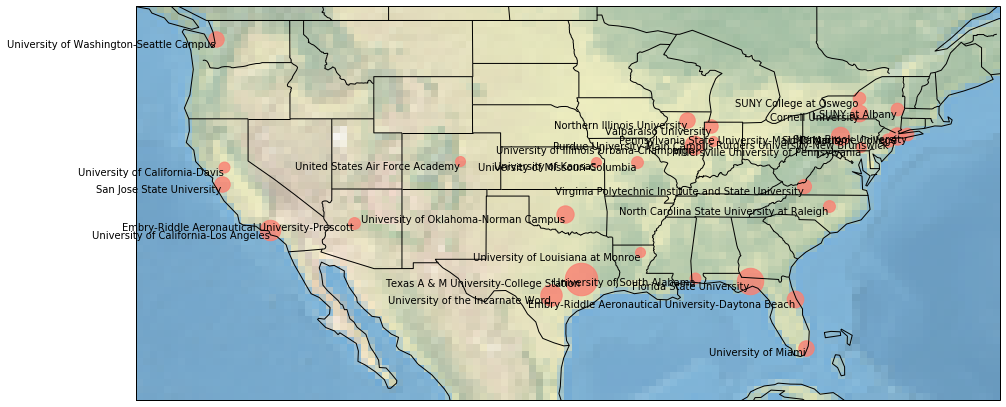

In [9]:
reader = shpreader.Reader(f'/glade/work/molina/DATA/cartopy_usstates/ne_50m_admin_1_states_provinces_lines.shp')
states = list(reader.geometries())
STATES = cfeature.ShapelyFeature(states, crs.PlateCarree())

fig = plt.figure(figsize=(12,10))

ax = fig.add_axes([0, 0, 1, 1], projection=crs.PlateCarree())

ax.stock_img()
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)

ax.set_extent([-128, -66.5, 22, 50], crs=crs.PlateCarree()) ## Important

for un, la, lo, fr in zip(uni, lat, lon, frq):

    plt.scatter(x=lo, y=la,
                color="salmon",
                s=fr * 20,
                alpha=0.8,
                transform=crs.PlateCarree()) ## Important
    
    ax.annotate(un, xy=(lo, la), 
                xycoords=crs.PlateCarree()._as_mpl_transform(ax),
                ha='right', va='top')

plt.show()
plt.close('all')